<a href="https://colab.research.google.com/github/Xenia-droid2003/sf_project/blob/main/%D0%A8%D0%B0%D1%84%D0%B8%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%BD%D0%BE%D0%B2%D1%8B%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЭТАП ПЕРВЫЙ: ИМПОРТ

In [1]:
# импортируем все необходимые библиотеки для работы с моделью, загрузки файлов и визуализации
!pip install -U ultralytics roboflow -q
from ultralytics import YOLO
from roboflow import Roboflow
import os
import shutil
from IPython.display import Image, display
import glob
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# загружаем датасет через ключ с RoboFlow
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="A7VUb6SQpoB6yOyYlJGW")
project = rf.workspace("street-dog-detection").project("stray-dogs-detection-hjxop")
version = project.version(7)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 107.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Stray-Dogs-Detection-7 in yolov8:: 100%|██████████| 1100/1100 [00:00<00:00, 6356.88it/s]


# ЭТАП ВТОРОЙ: ПРЕДОБУЧЕННАЯ МОДЕЛЬ И FINE-TUNING

In [2]:
# загружаем предобученную YOLOv8n (веса на COCO)
model = YOLO("yolov8n.pt")  # предобученная модель

# fine-tuning на датасете бездомных собак
results = model.train(
    data=f"{dataset.location}/data.yaml",  # YAML от Roboflow
    epochs=15,
    imgsz=512,
    batch=16,
    workers=2,
    name="yolov8n_stray_dogs",
    pretrained=True
)

Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Stray-Dogs-Detection-7/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_stray_dogs, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

# ЭТАП ТРЕТИЙ: ОЦЕНКА И ИНФЕРЕНС

In [3]:
# оценка на валидации: Ultralytics посчитает mAP, precision/recall
metrics = model.val(data=f"{dataset.location}/data.yaml")
print("mAP:", metrics.box.map)

Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1128.6±275.6 MB/s, size: 72.6 KB)
val: Scanning /content/Stray-Dogs-Detection-7/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 60/60 46.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 5.1s/it 20.3s
                   all         60         99      0.883      0.778      0.858      0.583
Speed: 3.5ms preprocess, 304.1ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to /content/runs/detect/val
mAP: 0.5830941672803388


In [4]:
# используем папку test из датасета как пример входных изображений
test_images_path = os.path.join(dataset.location, "test", "images")
!ls {test_images_path} | head

0009450a8ed12bd4_jpg.rf.3018abec4b1f8c3b79357ee9cb54b1e1.jpg
00934904547ee267_jpg.rf.1e0033710e7b162c904aa0158e0561a6.jpg
00a8b82f9944ae6c_jpg.rf.4b90665454507571f988c8374389e28d.jpg
1600769021edc7ba_jpg.rf.c79a2f1cd6b8ff0bee2aa7091e25df34.jpg
18446cfd9e5dbfe5_jpg.rf.7789910bce746c3aebf251496cec458f.jpg
18746b676c9bc55b_jpg.rf.b44d8d359c431454511046f4936c8753.jpg
1ff790ca70c9f51a_jpg.rf.573062b6c0e904d316b71e88da08f7a7.jpg
27b4cdc069f8599a_jpg.rf.0a78d70ab63a0d18fe2849d627d4957e.jpg
2a4efb65457d8d87_jpg.rf.040660492a94ffb49c100744b1cf007e.jpg
32997f8a758ba883_jpg.rf.c38e1137b27ba6fea03cc8c6d63916b2.jpg


In [5]:
# загружаем лучшие веса после обучения
best_model = YOLO("runs/detect/yolov8n_stray_dogs/weights/best.pt")

results = best_model.predict(
    source=test_images_path,  # папка с изображениями
    conf=0.25,
    save=True                 # сохранит результаты в runs/detect/predict
)


image 1/101 /content/Stray-Dogs-Detection-7/test/images/0009450a8ed12bd4_jpg.rf.3018abec4b1f8c3b79357ee9cb54b1e1.jpg: 512x512 2 dogs, 180.6ms
image 2/101 /content/Stray-Dogs-Detection-7/test/images/00934904547ee267_jpg.rf.1e0033710e7b162c904aa0158e0561a6.jpg: 512x512 1 dog, 180.7ms
image 3/101 /content/Stray-Dogs-Detection-7/test/images/00a8b82f9944ae6c_jpg.rf.4b90665454507571f988c8374389e28d.jpg: 512x512 2 dogs, 164.7ms
image 4/101 /content/Stray-Dogs-Detection-7/test/images/1600769021edc7ba_jpg.rf.c79a2f1cd6b8ff0bee2aa7091e25df34.jpg: 512x512 1 dog, 171.2ms
image 5/101 /content/Stray-Dogs-Detection-7/test/images/18446cfd9e5dbfe5_jpg.rf.7789910bce746c3aebf251496cec458f.jpg: 512x512 3 dogs, 158.0ms
image 6/101 /content/Stray-Dogs-Detection-7/test/images/18746b676c9bc55b_jpg.rf.b44d8d359c431454511046f4936c8753.jpg: 512x512 2 dogs, 161.8ms
image 7/101 /content/Stray-Dogs-Detection-7/test/images/1ff790ca70c9f51a_jpg.rf.573062b6c0e904d316b71e88da08f7a7.jpg: 512x512 3 dogs, 180.2ms
image 8

# ЭТАП ЧЕТВЁРТЫЙ: ДЕМОНСТРАЦИЯ РАБОТЫ


Saving собака1.jpg to собака1.jpg
Saving собака2.jpg to собака2.jpg
Saving собака3.jpg to собака3.jpg
Загружены файлы: ['custom_images/собака1.jpg', 'custom_images/собака2.jpg', 'custom_images/собака3.jpg']

0: 512x512 3 dogs, 198.6ms
1: 512x512 2 dogs, 198.6ms
2: 512x512 1 dog, 198.6ms
Speed: 10.8ms preprocess, 198.6ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)


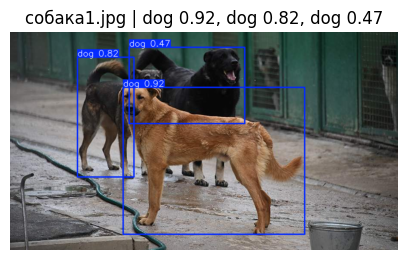

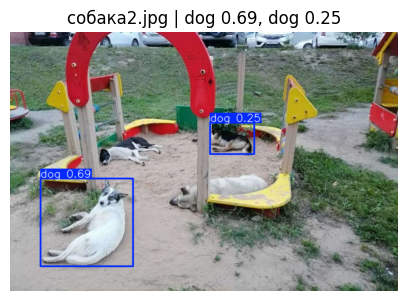

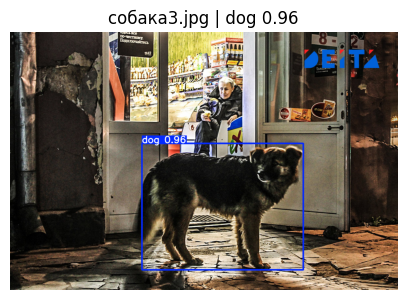

In [6]:
best_model = YOLO("runs/detect/yolov8n_stray_dogs/weights/best.pt")

# занружаем нескольких изображений одним вызовом
uploaded = files.upload()  # выбери сразу 3 файла

custom_dir = "custom_images"
os.makedirs(custom_dir, exist_ok=True)

image_paths = []
for fname, data in uploaded.items():
    path = os.path.join(custom_dir, fname)
    with open(path, "wb") as f:
        f.write(data)
    image_paths.append(path)

print("Загружены файлы:", image_paths)

# даём редсказание сразу по всем изображениям
results = best_model.predict(source=image_paths, conf=0.25)

# показываем каждую картинку с рамкой и подписью
for path, r in zip(image_paths, results):
    im_bgr = r.plot()
    im_rgb = im_bgr[..., ::-1]

    caption_parts = []
    for box in r.boxes:
        cls_id = int(box.cls[0])
        cls_name = best_model.names[cls_id]
        score = float(box.conf[0])
        caption_parts.append(f"{cls_name} {score:.2f}")
    caption = ", ".join(caption_parts) if caption_parts else "No detections"

    plt.figure(figsize=(5, 5))
    plt.imshow(im_rgb)
    plt.axis("off")
    plt.title(os.path.basename(path) + " | " + caption)
    plt.show()